# 4.immo_eliza_analysis

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
pd.options.display.max_colwidth = 300
pd.options.display.max_columns = 30

In [19]:


def convert_datatypes(df):
    """
    Function used to convert the database in a version +-30% the weight of the original
    :param df: the original version of the database Dataframe
    :type df: pd.DataFrame
    :return: a lightweight version of the database DataFrame (without dataloss)
    :rtype: pd.DataFrame
    """
    property_subtype = (
        "penthouse",
        "building",
        "studio",
        "duplex",
        "triplex",
        "loft",
        "ground floor",
        "student",
        "investment property",
        "villa",
        "mansion",
        "mixed",
        "apartments row",
        "farmhouse",
        "cottage",
        "floor",
        "town",
        "service flat",
        "manor",
        "castle",
        "pavilion",
    )
    df["Source"] = pd.Categorical(df["Source"])
    # for column in df.columns:
    #     print(column, df[column].unique())

    df["Type of property"] = pd.Categorical(
        df["Type of property"], categories=("apartment", "house"), ordered=True
    )
    df["Type of sale"] = pd.Categorical(
        df["Type of sale"], categories=("regular sale", "public sale")
    )
    df["Subtype of property"] = pd.Categorical(
        df["Subtype of property"], categories=property_subtype
    )
    df["State of the building"] = pd.Categorical(
        df["State of the building"],
        categories=("to renovate", "good", "new"),
        ordered=True,
    )
    df["Province"] = pd.Categorical(
        df["Province"],
        categories=("West-Vlanderen", 
                    "Oost-Vlanderen", 
                    "Vlaams-Brabant",
                    "Brussels",
                    "Liège",
                    "Hainaut",
                    "Luxembourg",
                    "Namur",
                    "Brabant Wallon",
                    "Limburg",
                    "Antwerp",
                    )
        )
    df["Region"] = pd.Categorical(
        df["Region"],
        categories=("Brussels Capital",
                    "Vlaams",
                    "Wallonie"
                   )
        )
  
    df["Fully equipped kitchen"] = df["Fully equipped kitchen"].astype(np.float16)
    df["Furnished"] = df["Furnished"].astype(np.float16)
    df["Locality"] = df["Locality"].astype(np.int16)
    df["Open fire"] = df["Open fire"].astype(np.float16)
    df["Swimming pool"] = df["Swimming pool"].astype(np.float16)
    df["Garden"] = df["Garden"].astype(np.float16)
    df["Terrace Area"] = df["Terrace Area"].astype(np.float32)
    df["Surface of the land"] = df["Surface of the land"].astype(np.float32)
    df["Surface area of the plot of land"] = df[
        "Surface area of the plot of land"
    ].astype(np.float32)
    df["Garden Area"] = df["Garden Area"].astype(np.float32)
    df["Number of facades"] = df["Number of facades"].astype(np.float16)
    df["Area"] = df["Area"].astype(np.float32)
    df["Terrace"] = df["Terrace"].astype(np.float32)
    df["Number of rooms"] = df["Number of rooms"].astype(np.float16)
    df["Fully equipped kitchen"] = df["Fully equipped kitchen"].astype(np.float16)
    df.reset_index(drop=True, inplace=True)
    return df

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/JulienAlardot/challenge-collecting-data/main/Data/database.csv', index_col=0, low_memory=False)
df = convert_datatypes(df)
df_raw_columns = df.copy().columns

In [21]:
df.isna().sum().sort_values(ascending=False)

Garden Area                         62517
Subtype of property                 58786
Terrace Area                        50235
Surface area of the plot of land    38613
Surface of the land                 38613
Number of facades                   37618
State of the building               33007
Furnished                           20035
Area                                11267
Price                                1004
Number of rooms                       904
Type of property                      380
Region                                  0
Type of sale                            0
Source                                  0
Locality                                0
Open fire                               0
Fully equipped kitchen                  0
Province                                0
Terrace                                 0
Garden                                  0
Swimming pool                           0
Url                                     0
dtype: int64

In [22]:
np.round(df.isna().sum().sort_values(ascending=False) / df.shape[0] *100, 2)

Garden Area                         85.05
Subtype of property                 79.97
Terrace Area                        68.34
Surface area of the plot of land    52.53
Surface of the land                 52.53
Number of facades                   51.17
State of the building               44.90
Furnished                           27.25
Area                                15.33
Price                                1.37
Number of rooms                      1.23
Type of property                     0.52
Region                               0.00
Type of sale                         0.00
Source                               0.00
Locality                             0.00
Open fire                            0.00
Fully equipped kitchen               0.00
Province                             0.00
Terrace                              0.00
Garden                               0.00
Swimming pool                        0.00
Url                                  0.00
dtype: float64

In [23]:
sns.set_theme("notebook")
sns.set_style("darkgrid")

Text(0, 0.5, 'Price')

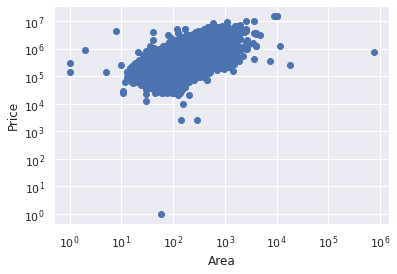

In [24]:
plt.scatter(df.Area, df.Price)
plt.xlabel('Area')
plt.xscale("log")
plt.yscale("log")
plt.ylabel('Price')

In [25]:
df[df.Area == df.Area.max()]
# https://www.immoweb.be/fr/annonce/appartement/a-vendre/courtrai/8500/8536825
df.loc[df.Area == df.Area.max(), "Area"] = 172

# Todo's

## Step 1 : Data Cleaning

You have collected your data! So it's time to do a cleaning on it. A cleaned dataset is a dataset that doesn't contain any duplicates, is blank spaces or error-free. The rest of the analysis can be discarded if you neglect this step!

    No duplicates
    No blank spaces (ex: " I love python " => "I love python")
    No errors
    No empty values

In [26]:
df.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/function_base.py:144: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.7/dist-packages/numpy/core/function_base.py:154: RuntimeWarning: invalid value encountered in add
  y += start
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/function_base.py:144: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.7/dist-packages/numpy/core/function_base.py:154: RuntimeWa

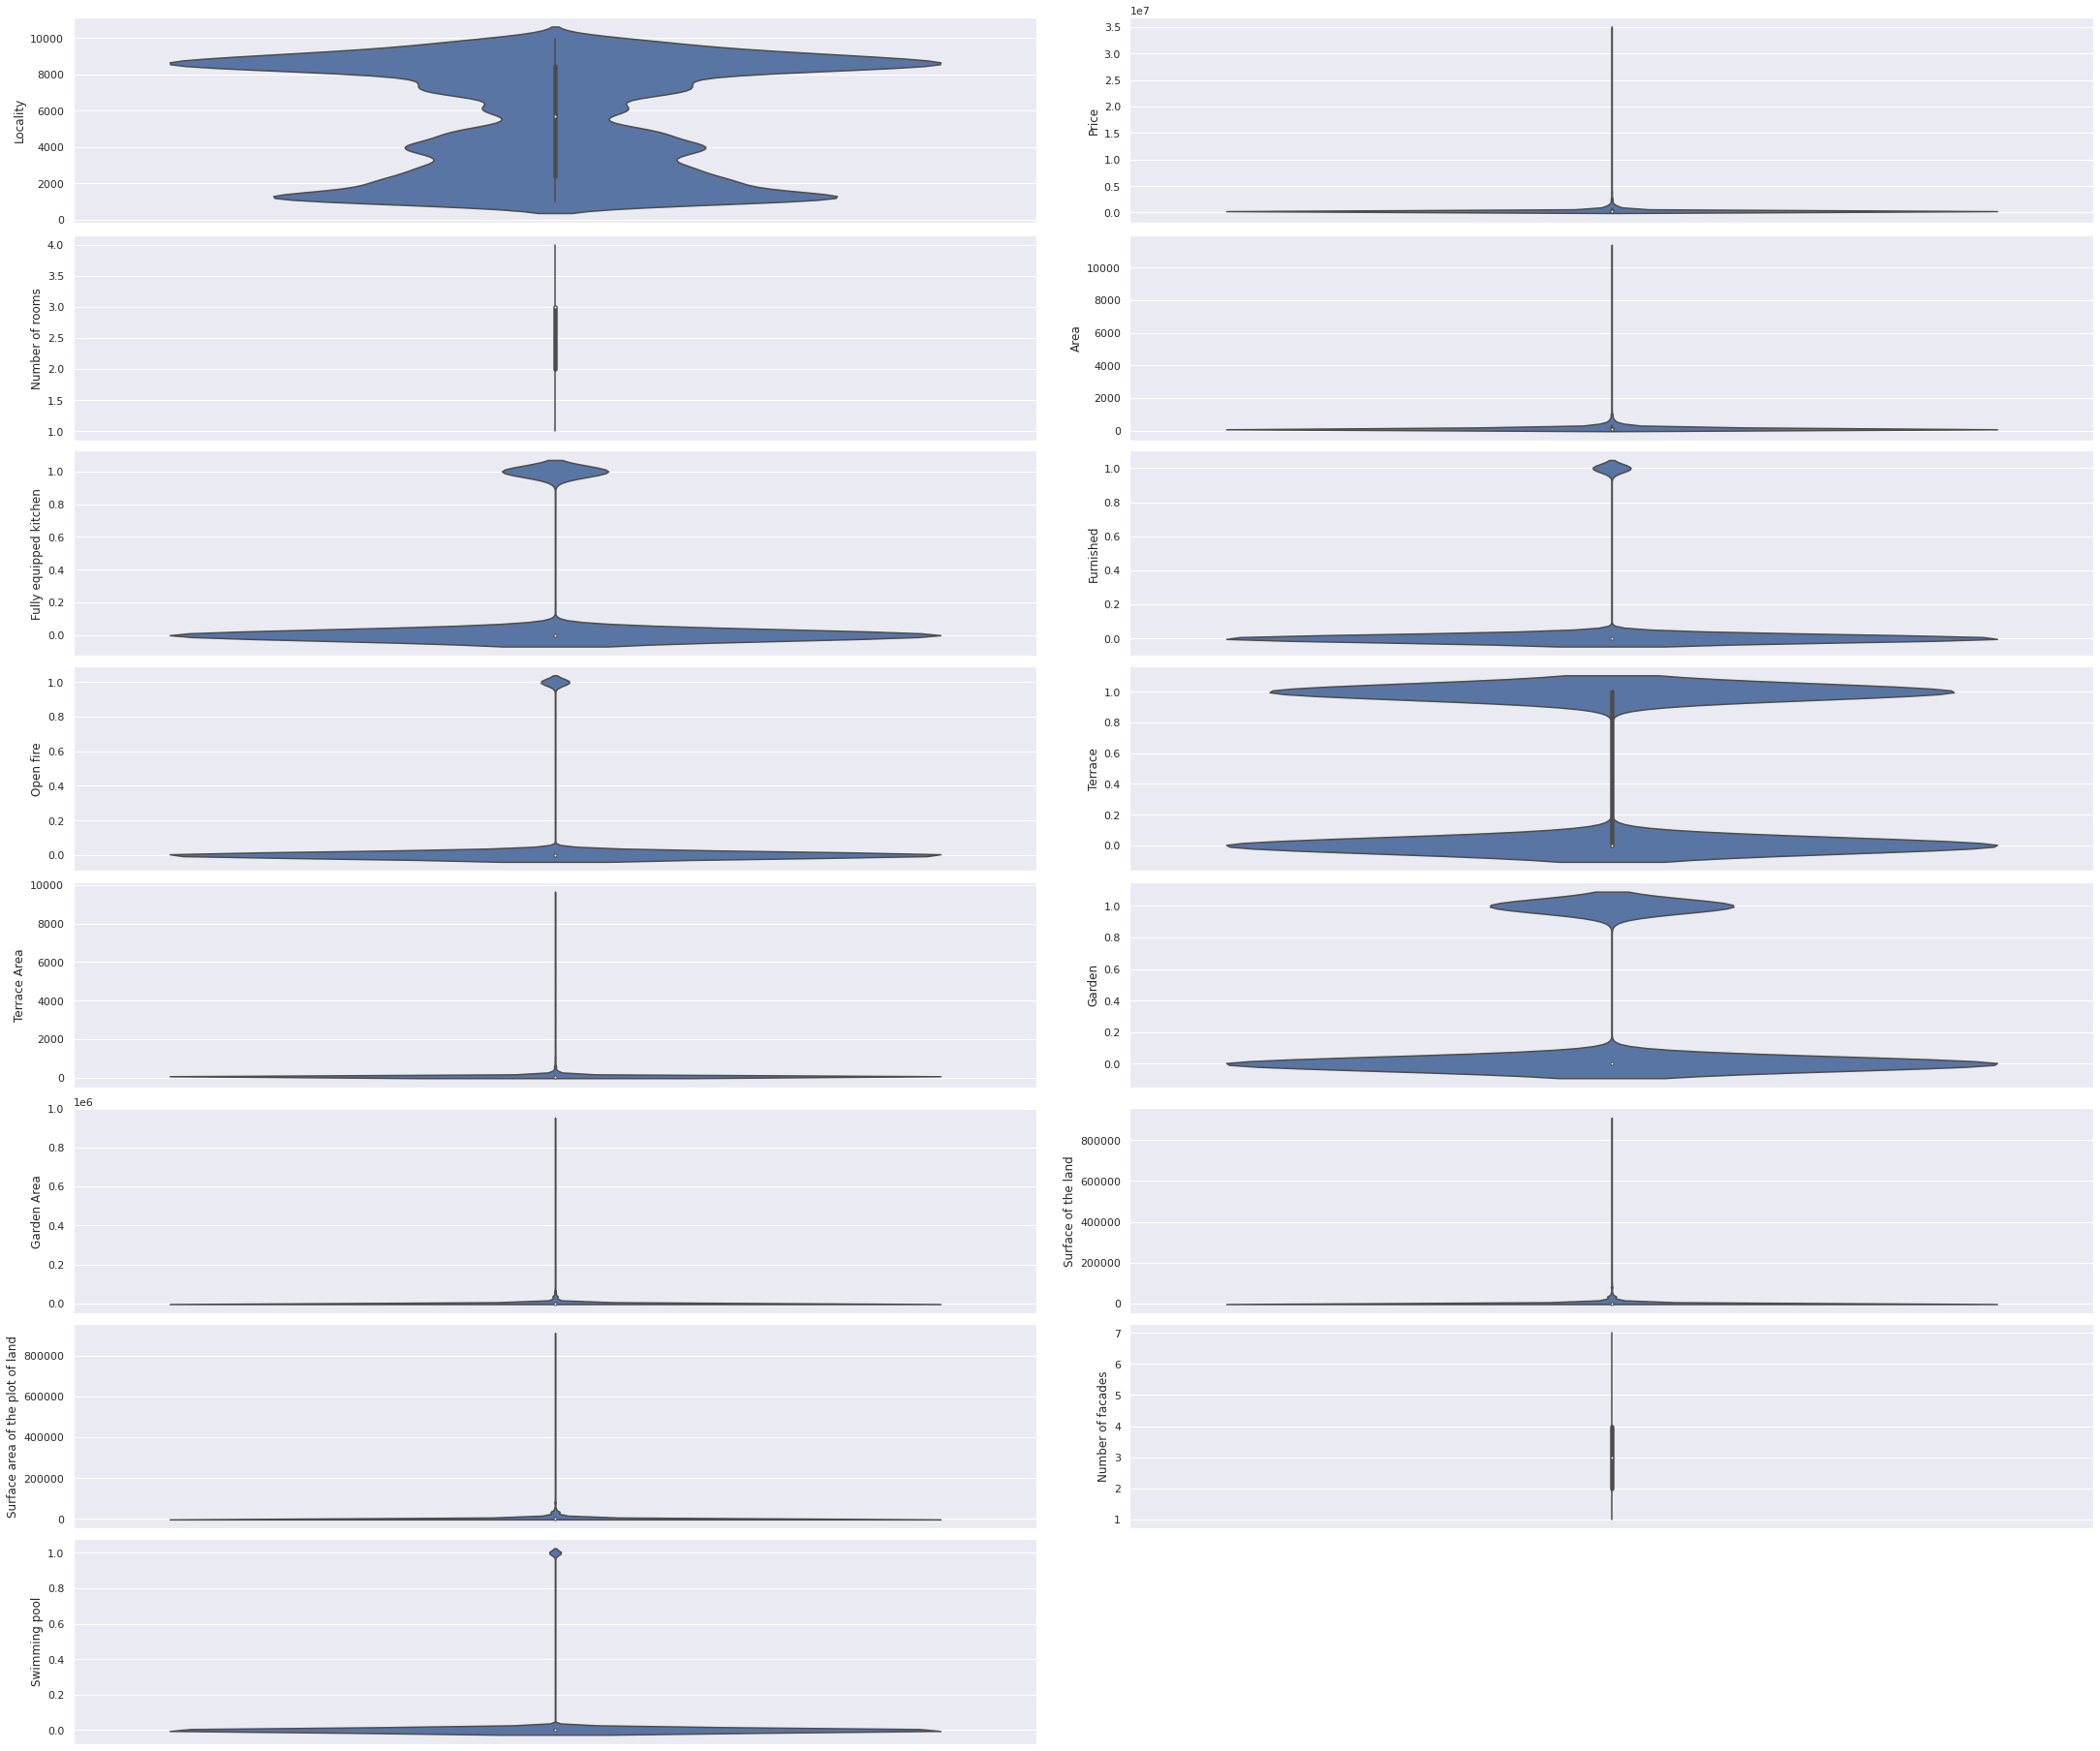

In [27]:
# https://www.immoweb.be/fr/annonce/appartement/a-vendre/courtrai/8500/8536825

df.loc[df.Area == df.Area.max(), "Area"] = 172
fig = plt.figure(figsize=(30,25), dpi=72, constrained_layout=True)
columns = [column for column in df.columns if str(df[column].dtype) not in ["object", "category"]]
gs = fig.add_gridspec(round(len(columns)/2+1), 2)
axes = list()
for i, column in enumerate(columns):
  axes.append(fig.add_subplot(gs[i//2, i%2]))
  sns.violinplot(data=df, y=column, ax=axes[i])
  # sns.scatterplot(data=df, x=column, ax=axes[i])
  # plt.yscale("log")
fig.show()

In [28]:
# Dropping too empty columns (> 75%)
bad_columns = df.isna().sum()[(df.isna().sum() / df.shape[0] *100) > 75].sort_values(ascending=False).index
df.drop(columns=bad_columns, inplace=True)
(df.isna().sum()  / df.shape[0] *100).sort_values(ascending = False)

Terrace Area                        68.337641
Surface area of the plot of land    52.527547
Surface of the land                 52.527547
Number of facades                   51.173990
State of the building               44.901374
Furnished                           27.254795
Area                                15.327166
Price                                1.365801
Number of rooms                      1.229765
Type of property                     0.516936
Region                               0.000000
Source                               0.000000
Locality                             0.000000
Type of sale                         0.000000
Open fire                            0.000000
Fully equipped kitchen               0.000000
Province                             0.000000
Terrace                              0.000000
Garden                               0.000000
Swimming pool                        0.000000
Url                                  0.000000
dtype: float64

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/function_base.py:144: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.7/dist-packages/numpy/core/function_base.py:154: RuntimeWarning: invalid value encountered in add
  y += start
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/function_base.py:144: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.7/dist-packages/numpy/core/function_base.py:154: RuntimeWa

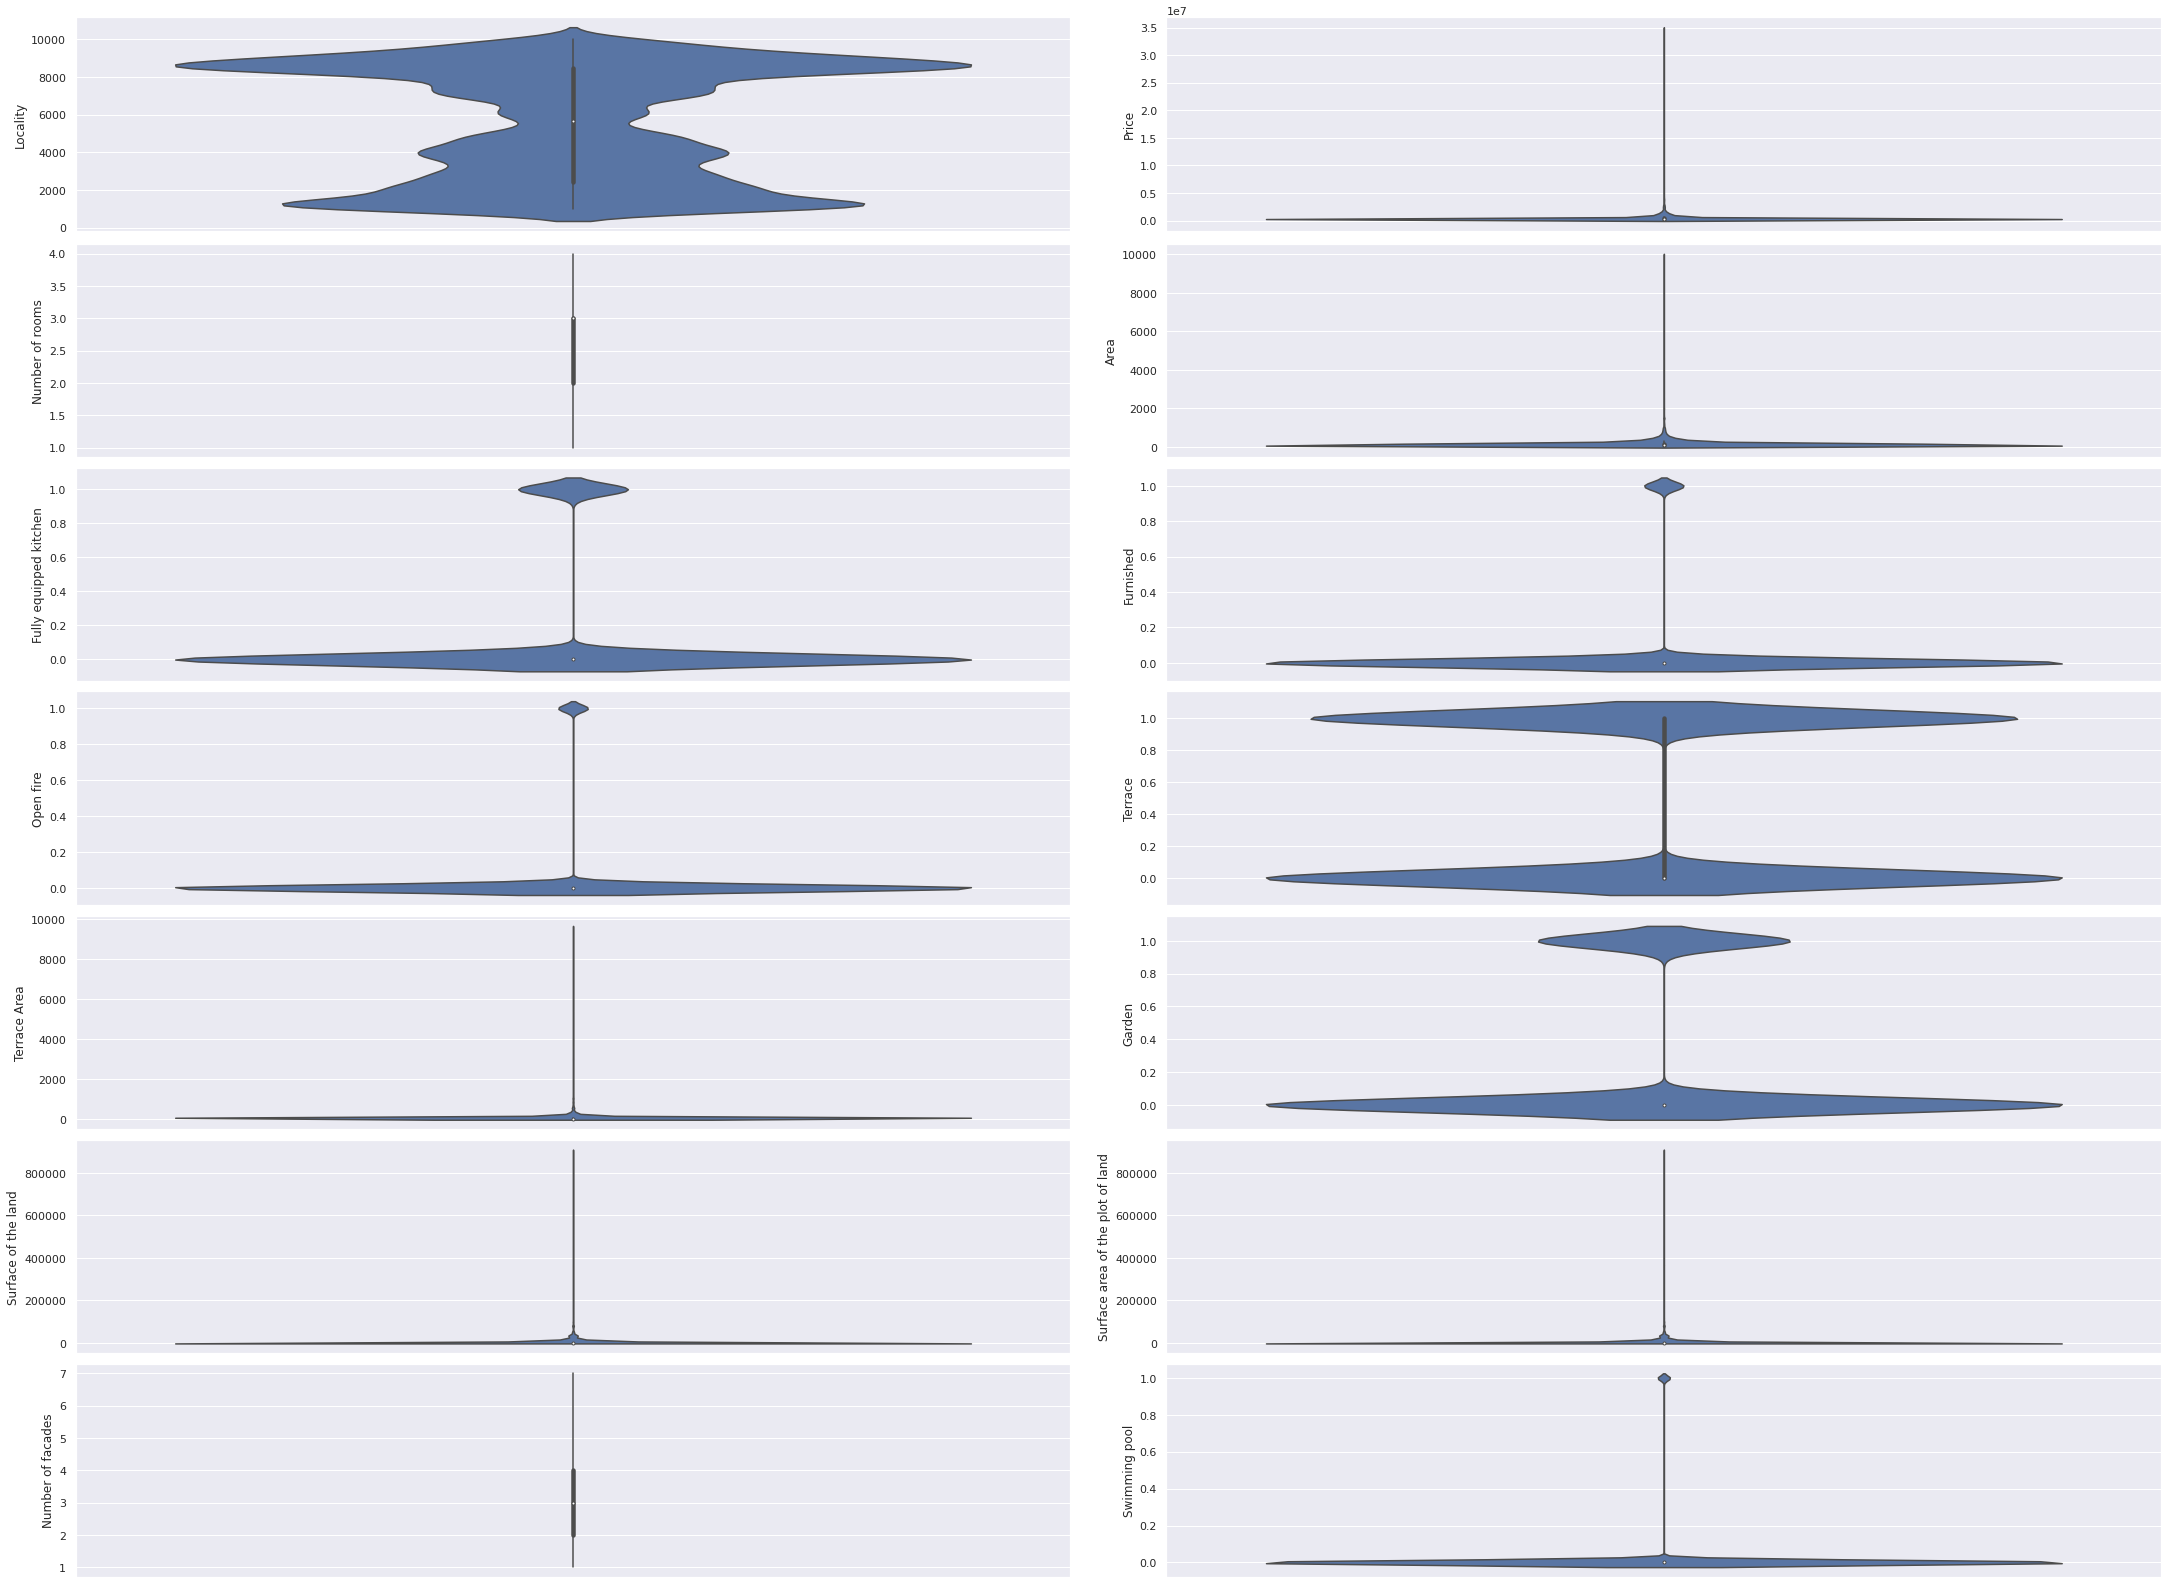

In [29]:

df.loc[df.Area == df.Area.max(), "Area"] = 172
fig = plt.figure(figsize=(30,25), dpi=72, constrained_layout=True)
columns = [column for column in df.columns if str(df[column].dtype) not in ["object", "category"]]
gs = fig.add_gridspec(round(len(columns)/2+1), 2)
axes = list()
for i, column in enumerate(columns):
  axes.append(fig.add_subplot(gs[i//2, i%2]))
  sns.violinplot(data=df, y=column, ax=axes[i])
  # sns.scatterplot(data=df, x=column, ax=axes[i])
  # plt.yscale("log")
fig.show()

In [30]:
df = df.loc[np.logical_or(np.logical_and(1000 <= df["Locality"], df["Locality"]<10000), df["Locality"].isna() )]
df = df.loc[df["Url"].str.lower().str.find("havre") == -1,:]
df = df.loc[df["Url"].str.lower().str.find("paris") == -1,:]
df = df.loc[df["Url"].str.lower().str.find("lille") == -1,:]

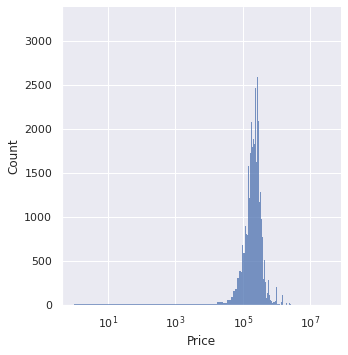

In [31]:
sns.displot(data=df, x="Price")
plt.xscale('log')
plt.show()

In [32]:
low_price = df.loc[np.logical_or(df["Price"]<1.2*10**4, df["Price"].isna()), :]
low_price[["Url", "Price"]].sort_values("Price", ascending=False)
df = df.loc[np.logical_or(df["Price"]>=10**4, df["Price"].isna()), :] # Offers below were mostly incorrect ones

In [33]:
high_price = df.loc[df["Price"]>5*10**6, :]
df.dropna(subset=["Price"], inplace=True)
# high_price.head(20)
high_price[["Url", "Price"]].sort_values("Price", ascending=False).head(10)

,Url,Price
37164,https://www.immoweb.be/fr/annonce/immeuble-a-appartements/a-vendre/haacht/3150/9291121,35000000.0
40694,https://www.immoweb.be/fr/annonce/immeuble-a-appartements/a-vendre/r(c)gion-de-leuven/3000/9064057,13500000.0
50334,https://www.immoweb.be/fr/annonce/maison/a-vendre/luik/4000/8960434,12544400.0
62679,https://www.immoweb.be/fr/annonce/autres-biens/a-vendre/celles/7760/8984127,10000000.0
29978,https://www.immoweb.be/fr/annonce/immeuble-mixte/a-vendre/lokeren/9160/9285592,10000000.0
52601,https://www.immoweb.be/fr/annonce/chateau/a-vendre/brussel/1000/9125971,9876543.0
35094,https://www.immoweb.be/fr/annonce/chateau/a-vendre/overijse/3090/9219731,9500000.0
56420,https://www.immoweb.be/fr/annonce/maison/a-vendre/knokke-zoute/8300/9045835,8500000.0
19286,https://www.immoweb.be/fr/annonce/immeuble-a-appartements/a-vendre/bierbeek/3360/9181485,7490000.0
31756,https://www.immoweb.be/fr/annonce/immeuble-a-appartements/a-vendre/saint-gilles/1060/9149790,7300000.0


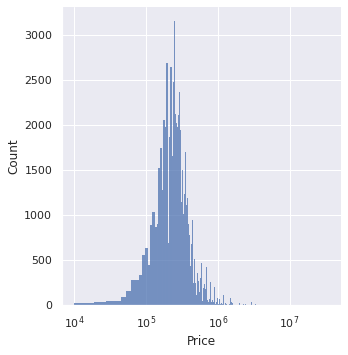

In [34]:
sns.displot(data=df, x="Price")
plt.xscale('log')
plt.show()

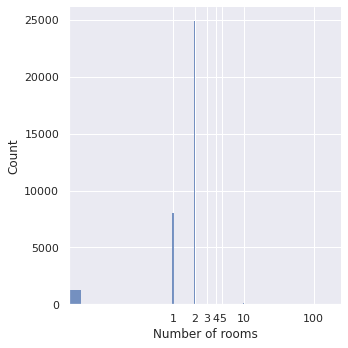

In [35]:
sns.displot(data=df, x="Number of rooms")
plt.xscale("log")
t = [1,2,3,4,5,10,100]
plt.xticks(ticks=t, labels=[str(x) for x in t])
plt.show()

In [36]:
df.where(df["Number of rooms"] >=1, inplace=True)
df = df.loc[np.logical_or(df["Number of rooms"] < 125, df["Number of rooms"].isna()),:] # Offers not available anymore or wrongly encoded
print(df[df["Number of rooms"].isna()].shape[0] / df.shape[0] * 100)
print(len(df["Number of rooms"].unique()))

2.8316872712203884
48


In [37]:
df.loc[df["Number of rooms"] > 10, ["Url", "Number of rooms"]].sort_values("Number of rooms", ascending = False).head(10)

,Url,Number of rooms
49922,https://www.immoweb.be/fr/annonce/appartement/a-vendre/gesves/5340/9179310,99.0
62679,https://www.immoweb.be/fr/annonce/autres-biens/a-vendre/celles/7760/8984127,90.0
56809,https://www.immoweb.be/fr/annonce/immeuble-a-appartements/a-vendre/lokeren/9160/8135299,80.0
52173,https://www.immoweb.be/fr/annonce/immeuble-a-appartements/a-vendre/gand/9000/9009562,70.0
31832,https://www.immoweb.be/fr/annonce/immeuble-a-appartements/a-vendre/diepenbeek/3590/9254849,66.0
21389,https://www.immoweb.be/fr/annonce/kot/a-vendre/diepenbeek/3590/9254846,66.0
42572,https://www.immoweb.be/fr/annonce/immeuble-a-appartements/a-vendre/verviers/4800/9202110,63.0
42566,https://www.immoweb.be/fr/annonce/immeuble-mixte/a-vendre/ambleve/4770/9309528,50.0
11142,https://www.logic-immo.be/fr/vente/maisons-a-vendre/ambleve-4770/maison-50-chambres-741b1873-11a7-ccbe-2c8a-bec10c8b5dd3.html,50.0
19286,https://www.immoweb.be/fr/annonce/immeuble-a-appartements/a-vendre/bierbeek/3360/9181485,47.0


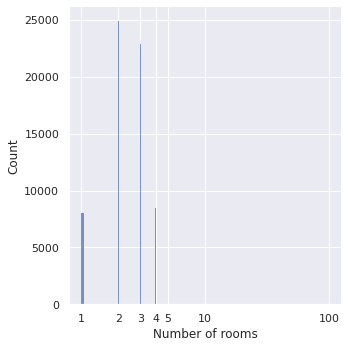

In [38]:
sns.displot(data=df, x="Number of rooms")
plt.xscale("log")
t = [1,2,3,4,5,10,100]
plt.xticks(ticks=t, labels=[str(x) for x in t])
plt.show()

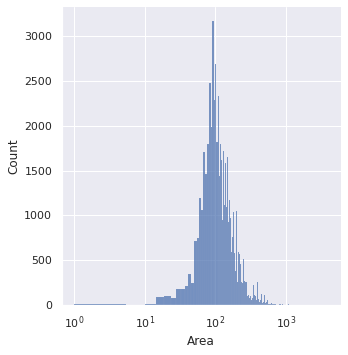

In [39]:
sns.displot(data=df, x="Area")
plt.xscale("log")
plt.show()

In [40]:
df = df.loc[np.logical_or(df["Area"] >= 11, df["Area"].isna()), :] # Hard drop of every illegal encoded values
df.loc[df["Area"].isna(), "Area"].shape[0] / df.shape[0] *100

17.194363862411937

In [41]:
df = df.loc[np.logical_or(df["Area"] <5000, df["Area"].isna()), :] # Drop of wrongly encoded values
print(df.loc[df["Area"].isna(), "Area"].shape[0] / df.shape[0] *100)
df[["Url", "Area"]].sort_values("Area", ascending=False).head(10)

17.194363862411937


,Url,Area
53381,https://www.immoweb.be/fr/annonce/villa/a-vendre/brakel/9660/9286819,4000.0
12152,https://www.logic-immo.be/fr/vente/maisons-a-vendre/brakel-9660/villa-5-chambres-02e16f8b-142b-f292-7454-5b4a0945c527.html,4000.0
29691,https://www.immoweb.be/fr/annonce/bien-exceptionnel/a-vendre/grimbergen/1853/9026551,4000.0
12324,https://www.logic-immo.be/fr/vente/maisons-a-vendre/bruxelles-1000/maison--f129ec00-b10a-4f59-a0c2-d9f252bab644.html,3989.0
38230,https://www.immoweb.be/fr/annonce/maison/a-vendre/gouvy/6671/9317538,3621.0
62679,https://www.immoweb.be/fr/annonce/autres-biens/a-vendre/celles/7760/8984127,3600.0
55986,https://www.immoweb.be/fr/annonce/appartement/a-vendre/schaerbeek/1030/9310100,3600.0
32368,https://www.immoweb.be/fr/annonce/bien-exceptionnel/a-vendre/liege/4000/9040124,2880.0
42572,https://www.immoweb.be/fr/annonce/immeuble-a-appartements/a-vendre/verviers/4800/9202110,2728.0
42566,https://www.immoweb.be/fr/annonce/immeuble-mixte/a-vendre/ambleve/4770/9309528,2600.0


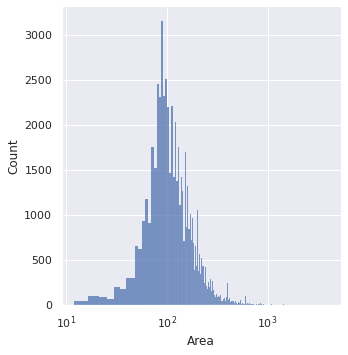

In [42]:
sns.displot(data=df, x="Area")
plt.xscale("log")
plt.show()

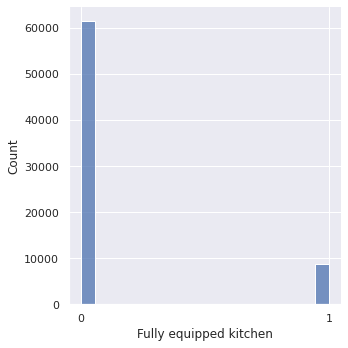

In [43]:
sns.displot(data=df, x="Fully equipped kitchen")
plt.xticks([0,1])
plt.show()

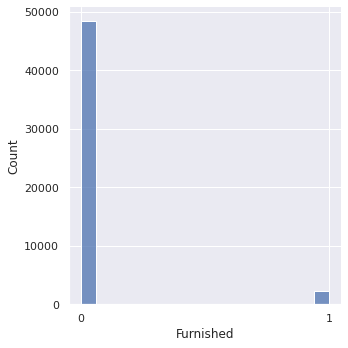

In [44]:
sns.displot(data=df, x="Furnished")
plt.xticks([0,1])
plt.show()

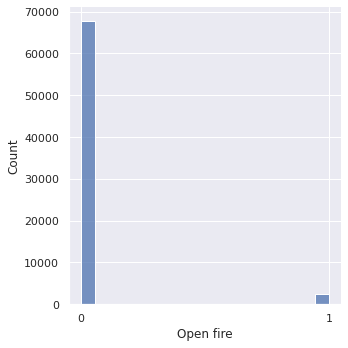

In [45]:
sns.displot(data=df, x="Open fire")
plt.xticks([0,1])
plt.show()

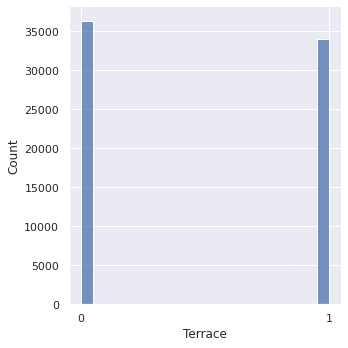

In [46]:
sns.displot(data=df, x="Terrace")
plt.xticks([0,1])
plt.show()

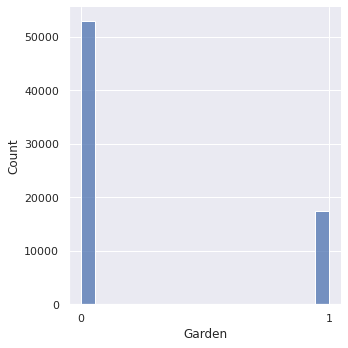

In [47]:
sns.displot(data=df, x="Garden")
plt.xticks([0,1])
plt.show()

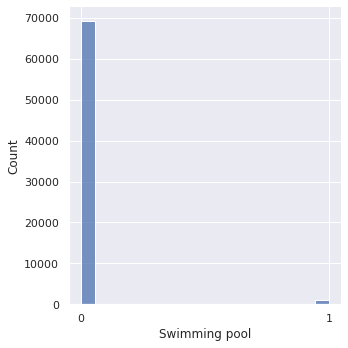

In [48]:
sns.displot(data=df, x="Swimming pool")
plt.xticks([0,1])
plt.show()

In [49]:
[column for column in df.columns if str(df[column].dtype) in ("object", "category")]

['Url',
 'Source',
 'Type of property',
 'Type of sale',
 'State of the building',
 'Province',
 'Region']

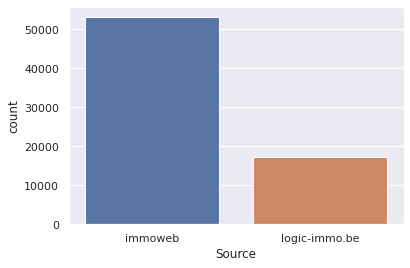

In [50]:
sns.countplot(data=df, x="Source")

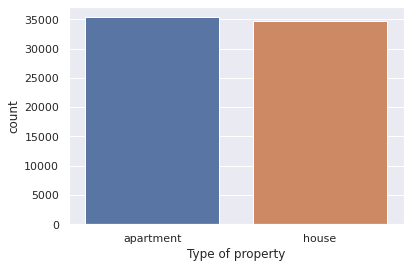

In [51]:
sns.countplot(data=df, x="Type of property")

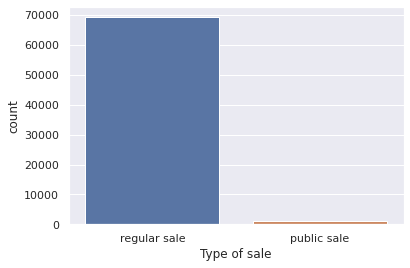

In [52]:
sns.countplot(data=df, x="Type of sale")

In [53]:
df.drop(columns=["Type of sale"], inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

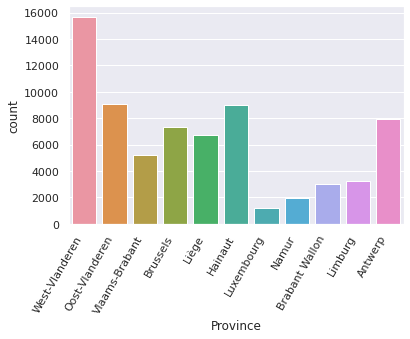

In [54]:
sns.countplot(data=df, x="Province")
plt.xticks(rotation=60, ha="right")

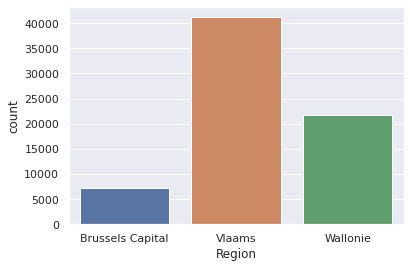

In [55]:
sns.countplot(data=df, x="Region")

In [56]:
df.dropna(how="all", inplace=True)
df.reset_index(drop=True,inplace=True)
df.drop(columns=["Url"], inplace=True)

In [57]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)


df = pd.get_dummies(df)
ndf = df.copy()
ndf[:] = imputer.fit_transform(df)

In [ ]:
ndf.drop(columns=["Region_Brussels Capital"], inplace=True)
ndf.drop(columns=["Province_Brussels"], inplace=True)
ndf.drop(columns=["Type of property_apartment"], inplace=True)


In [72]:
ndf.drop(columns=["Surface area of the plot of land"], inplace=True)

KeyError: ignored

In [73]:
ndf.drop(columns=["State of the building_good"], inplace=True)

KeyError: ignored

In [ ]:
ndf.drop(columns=["Source_immoweb"], inplace=True)

In [75]:
ndf[df.isna().sum(axis=1) > 0]

,Locality,Price,Number of rooms,Area,Fully equipped kitchen,Furnished,Open fire,Terrace,Terrace Area,Garden,Surface of the land,Number of facades,Swimming pool,Source_logic-immo.be,Type of property_house,State of the building_to renovate,State of the building_new,Province_West-Vlanderen,Province_Oost-Vlanderen,Province_Vlaams-Brabant,Province_Liège,Province_Hainaut,Province_Luxembourg,Province_Namur,Province_Brabant Wallon,Province_Limburg,Province_Antwerp,Region_Vlaams,Region_Wallonie
0,2970.0,319799.0,1.0,108.5,0.0,0.0,0.0,1.0,11.0,0.0,529.5,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,2970.0,291999.0,1.0,103.5,0.0,0.0,0.0,1.0,6.0,0.0,369.5,3.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2970.0,764999.0,2.0,153.0,0.0,0.0,0.0,1.0,62.0,0.0,3418.5,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,2970.0,660264.0,3.0,316.0,0.0,0.0,0.0,1.0,160.0,0.0,695.5,3.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,3200.0,294999.0,2.0,80.0,0.0,0.0,0.0,0.0,15.0,0.0,1206.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70335,8770.0,356000.0,4.0,139.0,0.0,0.0,0.0,0.0,14.0,1.0,285.0,2.5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
70336,6000.0,175000.0,4.0,205.0,0.0,0.0,0.0,1.0,23.0,1.0,800.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
70337,6000.0,185000.0,4.0,200.0,0.0,0.0,0.0,1.0,23.0,1.0,1000.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
70338,1480.0,310442.0,3.0,100.0,0.0,0.0,0.0,0.0,40.5,0.0,465.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [76]:
ndf.isna().sum()

Locality                             0
Price                                0
Number of rooms                      0
Area                                 0
Fully equipped kitchen               0
Furnished                            0
Open fire                            0
Terrace                              0
Terrace Area                         0
Garden                               0
Surface of the land                  0
Number of facades                    0
Swimming pool                        0
Source_logic-immo.be                 0
Type of property_house               0
State of the building_to renovate    0
State of the building_new            0
Province_West-Vlanderen              0
Province_Oost-Vlanderen              0
Province_Vlaams-Brabant              0
Province_Liège                       0
Province_Hainaut                     0
Province_Luxembourg                  0
Province_Namur                       0
Province_Brabant Wallon              0
Province_Limburg         

In [77]:
ndf.to_csv("clean_database.csv")

In [78]:
dropped_columns = [column for column in df_raw_columns if column not in df.columns]
dropped_columns

['Url',
 'Source',
 'Type of property',
 'Subtype of property',
 'Type of sale',
 'Garden Area',
 'State of the building',
 'Province',
 'Region']

## Step 2 : Data Analysis

Now that the data has been collected and cleaned, it is time for the analysis. What is the target variable? How many variables and inputs do you have? And so on...

Use the tools such as matplotlib/seaborn !

You must be able to answer :

    Which variable is the target ?
    How many rows and columns ?
    What is the correlation between the variables and the target ? (Why might that be?)
    What is the correlation between the variables and the other variables ? (Why?)
    Which variables have the greatest influence on the target ?
    Which variables have the least influence on the target ?
    How many qualitative and quantitative variables are there ? How would you transform these values into numerical values ?
    Percentage of missing values per column ?

In [82]:

ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70340 entries, 0 to 70339
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Locality                           70340 non-null  float64
 1   Price                              70340 non-null  float64
 2   Number of rooms                    70340 non-null  float64
 3   Area                               70340 non-null  float64
 4   Fully equipped kitchen             70340 non-null  float64
 5   Furnished                          70340 non-null  float64
 6   Open fire                          70340 non-null  float64
 7   Terrace                            70340 non-null  float64
 8   Terrace Area                       70340 non-null  float64
 9   Garden                             70340 non-null  float64
 10  Surface of the land                70340 non-null  float64
 11  Number of facades                  70340 non-null  flo

In [80]:
ndf[np.logical_and(ndf["Province_Namur"] == 1, ndf["Region_Wallonie"] == 0)]

,Locality,Price,Number of rooms,Area,Fully equipped kitchen,Furnished,Open fire,Terrace,Terrace Area,Garden,Surface of the land,Number of facades,Swimming pool,Source_logic-immo.be,Type of property_house,State of the building_to renovate,State of the building_new,Province_West-Vlanderen,Province_Oost-Vlanderen,Province_Vlaams-Brabant,Province_Liège,Province_Hainaut,Province_Luxembourg,Province_Namur,Province_Brabant Wallon,Province_Limburg,Province_Antwerp,Region_Vlaams,Region_Wallonie


In [81]:
upp_mat = np.triu(ndf.corr())
fig = plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), vmin = 0, vmax = +1, annot = True, cmap = 'coolwarm', mask=upp_mat)
plt.tight_layout()

ValueError: ignored

<Figure size 1440x720 with 0 Axes>

In [ ]:
sns.pairplot(df)
plt.xscale("log")
plt.yscale("log")

## Step 3 : Data Interpretation

After analyzing your data, it's finally time to interpret your results. You have to communicate your analysis using simple words and a table or graph, then use the results to decide on your best course of action.

Example of questions you should be able to answer to:

NB: This is a non-exhaustive list. Try to make a maximum of interpretations of the dataset. Bonus points from yours truly for creative and outside the box questions that you answer.

You must be able to answer :

    Are there any outliers? If yes, which ones and why?
    Which variables would you delete and why ?
    In your opinion, which 5 variables are the most important and why?
    What are the most expensive municipalities in Belgium? (Average price, median price, price per square meter)
    What are the most expensive municipalities in Wallonia? (Average price, median price, price per square meter)
    What are the most expensive municipalities in Flanders? (Average price, median price, price per square meter)
    What are the less expensive municipalities in Belgium? (Average price, median price, price per square meter)
    What are the less expensive municipalities in Wallonia? (Average price, median price, price per square meter)
    What are the less expensive municipalities in Flanders? (Average price, median price, price per square meter)

## Bonus
    In your opinion, which model of machine learning could solve the task of predicting the sales?